In [1]:
import pandas as pd
import numpy as np

# We'll create a fake binary dataset with 20 items and 500 scenarios.
np.random.seed(123) # This makes our random data reproducible.
n_items = 20
n_scenarios = 500
practice_data = np.random.randint(0, 2, size=(n_items, n_scenarios))

# IMPORTANT: Factor analysis needs items in columns and observations in rows.
# We must transpose the matrix and load it into a pandas DataFrame.
df = pd.DataFrame(practice_data.T) # .T is for transpose

# Let's give the columns (our items) generic names for clarity
df.columns = [f'item_{i+1}' for i in range(n_items)]

print("Data shape:", df.shape)
print(df.head())

Data shape: (500, 20)
   item_1  item_2  item_3  item_4  item_5  item_6  item_7  item_8  item_9  \
0       0       0       0       0       1       1       0       0       1   
1       1       0       1       1       1       1       1       0       0   
2       0       1       1       1       1       0       0       1       1   
3       0       1       1       0       1       1       1       0       1   
4       0       0       1       0       1       0       0       1       1   

   item_10  item_11  item_12  item_13  item_14  item_15  item_16  item_17  \
0        0        1        1        1        0        0        1        1   
1        1        0        0        0        1        0        0        1   
2        1        0        0        1        1        0        0        1   
3        1        0        0        1        0        0        0        1   
4        1        1        0        0        0        1        0        1   

   item_18  item_19  item_20  
0        0        0  

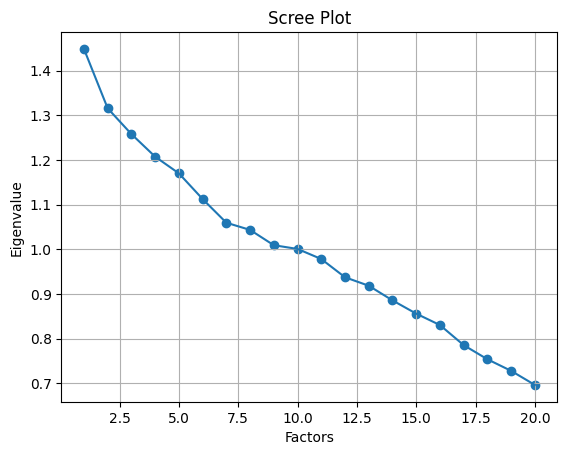

In [2]:
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = df.corr()

# Get eigenvalues from the correlation matrix
ev, v = np.linalg.eig(corr_matrix)

# Sort eigenvalues in descending order
ev = np.sort(ev)[::-1]

# Create the scree plot
plt.scatter(range(1, len(ev) + 1), ev)
plt.plot(range(1, len(ev) + 1), ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [3]:
from factor_analyzer import FactorAnalyzer

# Let's say the scree plot suggested 4 factors.
num_factors = 4 # <-- CHANGE THIS NUMBER based on your scree plot.

# Create the FactorAnalyzer object and fit the model.
# - rotation="varimax" is a standard method to make results easier to interpret.
fa = FactorAnalyzer(n_factors=num_factors, rotation="varimax")
fa.fit(df)

/opt/homebrew/Caskroom/miniconda/base/envs/reeval/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,n_factors,4
,rotation,'varimax'
,method,'minres'
,use_smc,True
,is_corr_matrix,False
,bounds,"(0.005, ...)"
,impute,'median'
,svd_method,'randomized'
,rotation_kwargs,{}


In [4]:
# Get the factor loadings and put them into a DataFrame
loadings_df = pd.DataFrame(fa.loadings_, index=df.columns)

# We can clean this up by hiding small values
loadings_df.style.map(lambda x: 'opacity: 20%' if abs(x) < 0.3 else '')

,0,1,2,3
item_1,-0.105582,0.119484,-0.055183,0.258998
item_2,0.533475,0.170000,-0.227905,-0.122078
item_3,-0.144129,0.207975,-0.018114,0.052953
item_4,0.078304,-0.159079,0.200684,0.141379
item_5,0.170032,-0.016518,0.185492,-0.103470
item_6,-0.144523,0.042128,0.052100,-0.253049
item_7,0.018603,-0.006990,-0.144413,0.054004
item_8,0.096211,-0.073432,-0.006683,-0.112392
item_9,0.095679,-0.043515,0.072678,-0.023180
item_10,0.026453,-0.015748,-0.072723,-0.174989


FACTOR ANALYSIS CONFIGURATION
Primary number of factors: 2
Factors to test: range(1, 51)
Rotation method: varimax
Missing value strategy: zero
Loading thresholds: High >= 0.3, Low < 0.2

Loading resmat data...
Original data shape: (183, 78712)
Column levels: ['input.text', 'scenario', 'benchmark']

Data info:
Index type: <class 'pandas.core.indexes.category.CategoricalIndex'>
Columns type: <class 'pandas.core.indexes.multi.MultiIndex'>
Index shape: (183,)
Columns shape: (78712,)
Number of column levels: 3
Level 0 (input.text): 78710 unique values
Level 1 (scenario): 22 unique values
  Values: ['lsat_qa', 'truthful_qa', 'synthetic_reasoning', 'babi_qa', 'wikifact', 'bbq', 'thai_exam', 'dyck_language_np=3', 'legal_support', 'civil_comments', 'legalbench', 'raft', 'air_bench_2024', 'math', 'med_qa', 'gsm', 'boolq', 'mmlu', 'entity_matching', 'entity_data_imputation', 'commonsense', 'imdb']
Level 2 (benchmark): 5 unique values
  Values: ['classic', 'thaiexam', 'lite', 'air-bench', 'mmlu']


/var/folders/gy/d7p0zrqx7l3f7dwplj0g_b040000gn/T/ipykernel_48051/709442372.py:77: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  scenario_benchmark_data = df_resmat.groupby(['scenario', 'benchmark'], axis=1).mean()
/var/folders/gy/d7p0zrqx7l3f7dwplj0g_b040000gn/T/ipykernel_48051/709442372.py:77: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  scenario_benchmark_data = df_resmat.groupby(['scenario', 'benchmark'], axis=1).mean()


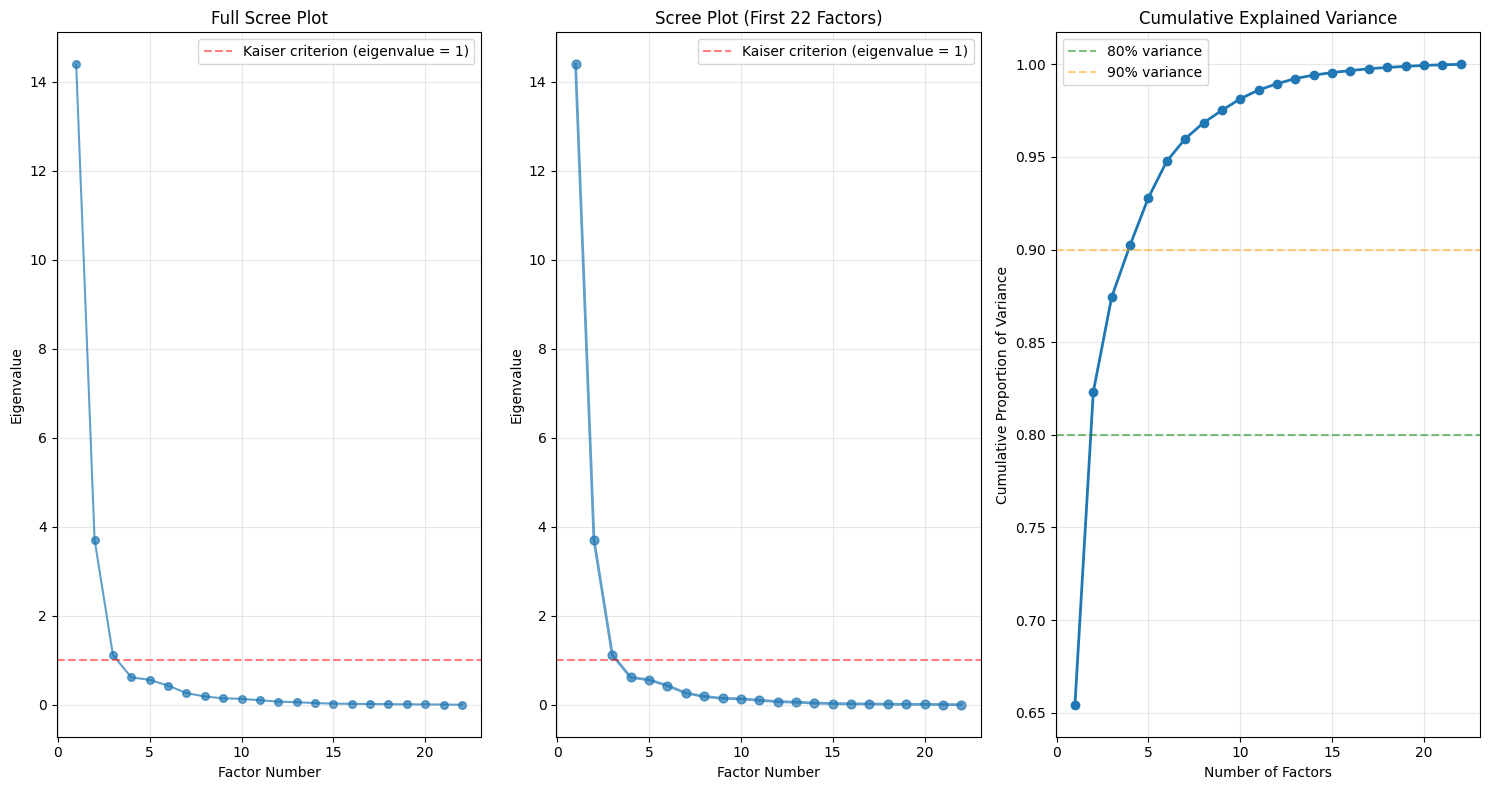

First 15 eigenvalues: [14.39438184  3.71565291  1.12517149  0.61705706  0.56393608  0.43383843
  0.26627845  0.18951823  0.14801667  0.13664217  0.10508233  0.07381616
  0.06193829  0.04121802  0.02947619]
Number of eigenvalues > 1: 3
Number of positive eigenvalues: 22
Variance explained by first 10 factors: [0.65429008 0.8231834  0.87432756 0.9023756  0.92800906 0.94772899
 0.95983256 0.96844702 0.97517505 0.98138606]

FACTOR ANALYSIS COMPARISON
 1 factors: Total explained variance = 0.644 (64.4%)
 2 factors: Total explained variance = 0.814 (81.4%)
 3 factors: Total explained variance = 0.843 (84.3%)
 4 factors: Total explained variance = 0.866 (86.6%)
 5 factors: Total explained variance = 0.874 (87.4%)
 6 factors: Total explained variance = 0.877 (87.7%)
 7 factors: Total explained variance = 0.884 (88.4%)


/opt/homebrew/Caskroom/miniconda/base/envs/reeval/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/reeval/lib/python3.10/site-packages/factor_analyzer/factor_analyzer.py:663: UserWarning: No rotation will be performed when the number of factors equals 1.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/reeval/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/reeval/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/reeval/lib/python3.10/site-packages/skl

 8 factors: Total explained variance = 0.894 (89.4%)
 9 factors: Total explained variance = 0.891 (89.1%)
10 factors: Total explained variance = 0.910 (91.0%)


/opt/homebrew/Caskroom/miniconda/base/envs/reeval/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/reeval/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/reeval/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


11 factors: Total explained variance = 0.922 (92.2%)
12 factors: Total explained variance = 0.924 (92.4%)
13 factors: Total explained variance = 0.928 (92.8%)


/opt/homebrew/Caskroom/miniconda/base/envs/reeval/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/reeval/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/reeval/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


14 factors: Total explained variance = 0.929 (92.9%)
15 factors: Total explained variance = 0.941 (94.1%)


/opt/homebrew/Caskroom/miniconda/base/envs/reeval/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/reeval/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


16 factors: Total explained variance = 0.911 (91.1%)
17 factors: Total explained variance = 0.912 (91.2%)
18 factors: Total explained variance = 0.918 (91.8%)
19 factors: Total explained variance = 0.919 (91.9%)


/opt/homebrew/Caskroom/miniconda/base/envs/reeval/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/reeval/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/reeval/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/reeval/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


20 factors: Total explained variance = 0.925 (92.5%)
21 factors: Total explained variance = 0.914 (91.4%)
22 factors: Total explained variance = 0.914 (91.4%)


/opt/homebrew/Caskroom/miniconda/base/envs/reeval/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/reeval/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
import pandas as pd
import numpy as np
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

# ========================================
# CONFIGURATION PARAMETERS
# ========================================
# Adjust these parameters to customize your analysis

# Factor Analysis Parameters
N_FACTORS_TO_TEST = range(1, 51)  # List of factor numbers to compare
ROTATION_METHOD = "varimax"  # Options: "varimax", "promax", "oblimin", "oblimax", "quartimin", "quartimax"

# Data Cleaning Parameters
MISSING_VALUE_STRATEGY = "zero"  # Options: "mean", "median", "zero", "drop"
REMOVE_ZERO_VARIANCE = True  # Whether to remove columns with zero variance
LOADING_THRESHOLD_HIGH = 0.3  # Threshold for highlighting high loadings
LOADING_THRESHOLD_LOW = 0.2   # Threshold for low opacity

# Visualization Parameters
FIGSIZE_SCREE = (15, 8)  # Figure size for scree plots
FIGSIZE_LOADINGS = (12, 8)  # Figure size for loadings plots
MAX_FACTORS_SCREE = 50  # Maximum number of factors to show in detailed scree plot

print("="*60)
print("FACTOR ANALYSIS CONFIGURATION")
print("="*60)
print(f"Primary number of factors: {PRIMARY_N_FACTORS}")
print(f"Factors to test: {N_FACTORS_TO_TEST}")
print(f"Rotation method: {ROTATION_METHOD}")
print(f"Missing value strategy: {MISSING_VALUE_STRATEGY}")
print(f"Loading thresholds: High >= {LOADING_THRESHOLD_HIGH}, Low < {LOADING_THRESHOLD_LOW}")
print("="*60)

# ========================================
# DATA LOADING AND EXPLORATION
# ========================================

# 1. Load the actual resmat data
print("\nLoading resmat data...")
df_resmat = pd.read_pickle("../data/resmat.pkl")
print(f"Original data shape: {df_resmat.shape}")
print(f"Column levels: {df_resmat.columns.names}")

# Debug: Let's examine the data structure more carefully
print(f"\nData info:")
print(f"Index type: {type(df_resmat.index)}")
print(f"Columns type: {type(df_resmat.columns)}")
print(f"Index shape: {df_resmat.index.shape}")
print(f"Columns shape: {df_resmat.columns.shape}")

if hasattr(df_resmat.columns, 'nlevels'):
    print(f"Number of column levels: {df_resmat.columns.nlevels}")
    for i in range(df_resmat.columns.nlevels):
        level_name = df_resmat.columns.names[i]
        unique_vals = df_resmat.columns.get_level_values(i).unique()
        print(f"Level {i} ({level_name}): {len(unique_vals)} unique values")
        if len(unique_vals) < 30:  # Only print if not too many
            print(f"  Values: {unique_vals.tolist()}")

# Check for missing values
print(f"\nMissing values: {df_resmat.isnull().sum().sum()}")

# ========================================
# DATA AGGREGATION
# ========================================

# 2. AGGREGATE THE DATA BY SCENARIO AND BENCHMARK
print(f"\n" + "="*50)
print("AGGREGATING DATA BY SCENARIO-BENCHMARK COMBINATIONS")
print("="*50)

# Group by scenario and benchmark, taking the mean performance across all items in each group
print("Aggregating data by scenario and benchmark (this may take a moment)...")
scenario_benchmark_data = df_resmat.groupby(['scenario', 'benchmark'], axis=1).mean()

print(f"Aggregated data shape: {scenario_benchmark_data.shape}")
print(f"Number of observations (models): {scenario_benchmark_data.shape[0]}")  
print(f"Number of scenario-benchmark combinations: {scenario_benchmark_data.shape[1]}")

# Display the scenario-benchmark combinations
print(f"\nScenario-benchmark combinations:")
for i, col in enumerate(scenario_benchmark_data.columns):
    print(f"  {i+1:2d}. {col[0]} - {col[1]}")

# ========================================
# DATA CLEANING
# ========================================

# 3. COMPREHENSIVE DATA CLEANING FOR FACTOR ANALYSIS
print(f"\n" + "="*50)
print("CLEANING DATA FOR FACTOR ANALYSIS")
print("="*50)

# Check for missing values
missing_before = scenario_benchmark_data.isnull().sum().sum()
print(f"Missing values before cleaning: {missing_before}")

# Apply missing value strategy
if MISSING_VALUE_STRATEGY == "mean":
    Y_cleaned = scenario_benchmark_data.fillna(scenario_benchmark_data.mean())
elif MISSING_VALUE_STRATEGY == "median":
    Y_cleaned = scenario_benchmark_data.fillna(scenario_benchmark_data.median())
elif MISSING_VALUE_STRATEGY == "zero":
    Y_cleaned = scenario_benchmark_data.fillna(0)
else:  # drop
    Y_cleaned = scenario_benchmark_data.dropna(axis=1)

# Check if any columns still have all NaN (meaning the column was entirely missing)
all_nan_cols = Y_cleaned.columns[Y_cleaned.isnull().all()]
if len(all_nan_cols) > 0:
    print(f"Columns with all NaN values: {len(all_nan_cols)}")
    for col in all_nan_cols:
        print(f"  {col}")
    # Fill these with 0
    Y_cleaned = Y_cleaned.fillna(0)

missing_after = Y_cleaned.isnull().sum().sum()
print(f"Missing values after cleaning: {missing_after}")

# Check for constant columns (zero variance) - these cause problems in correlation
if REMOVE_ZERO_VARIANCE:
    print("\nChecking for constant columns...")
    variances = Y_cleaned.var()
    zero_var_cols = variances[variances == 0].index
    if len(zero_var_cols) > 0:
        print(f"Columns with zero variance: {len(zero_var_cols)}")
        for col in zero_var_cols:
            print(f"  {col}: std = {Y_cleaned[col].std():.6f}")
        # Remove zero variance columns
        Y_cleaned = Y_cleaned.drop(columns=zero_var_cols)
        print(f"Removed {len(zero_var_cols)} zero-variance columns")

# Check for infinite values
inf_count = np.isinf(Y_cleaned).sum().sum()
if inf_count > 0:
    print(f"Found {inf_count} infinite values, replacing with 0")
    Y_cleaned = Y_cleaned.replace([np.inf, -np.inf], 0)

Y_for_analysis = Y_cleaned
print(f"\nFinal cleaned data shape: {Y_for_analysis.shape}")
print(f"Data range: [{Y_for_analysis.min().min():.3f}, {Y_for_analysis.max().max():.3f}]")

# ========================================
# EIGENVALUE ANALYSIS AND SCREE PLOT
# ========================================

# 4. Create a scree plot to determine the number of factors
print(f"\n" + "="*50)
print("EIGENVALUE ANALYSIS")
print("="*50)

print("Calculating correlation matrix...")
corr_matrix = Y_for_analysis.corr()

# Check correlation matrix for issues
print(f"Correlation matrix shape: {corr_matrix.shape}")
print(f"Correlation matrix has NaN: {corr_matrix.isnull().sum().sum()}")
print(f"Correlation matrix has inf: {np.isinf(corr_matrix).sum().sum()}")

# Additional cleaning of correlation matrix if needed
if corr_matrix.isnull().sum().sum() > 0 or np.isinf(corr_matrix).sum().sum() > 0:
    print("Cleaning correlation matrix...")
    # Fill diagonal with 1s, off-diagonal NaNs with 0
    np.fill_diagonal(corr_matrix.values, 1.0)
    corr_matrix = corr_matrix.fillna(0)
    corr_matrix = corr_matrix.replace([np.inf, -np.inf], 0)

print("Calculating eigenvalues for scree plot...")
eigenvalues, eigenvectors = np.linalg.eig(corr_matrix)
eigenvalues = np.sort(np.real(eigenvalues))[::-1]  # Sort in descending order and take real part

# Create the scree plot
fig, axes = plt.subplots(1, 3, figsize=FIGSIZE_SCREE)

# Full scree plot
axes[0].scatter(range(1, len(eigenvalues) + 1), eigenvalues, alpha=0.7, s=30)
axes[0].plot(range(1, len(eigenvalues) + 1), eigenvalues, alpha=0.7)
axes[0].axhline(y=1.0, color='r', linestyle='--', alpha=0.5, label='Kaiser criterion (eigenvalue = 1)')
axes[0].set_title('Full Scree Plot')
axes[0].set_xlabel('Factor Number')
axes[0].set_ylabel('Eigenvalue')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Zoomed in version for better visibility
n_show = min(MAX_FACTORS_SCREE, len(eigenvalues))
axes[1].scatter(range(1, n_show + 1), eigenvalues[:n_show], alpha=0.7, s=40)
axes[1].plot(range(1, n_show + 1), eigenvalues[:n_show], alpha=0.7, linewidth=2)
axes[1].axhline(y=1.0, color='r', linestyle='--', alpha=0.5, label='Kaiser criterion (eigenvalue = 1)')
axes[1].set_title(f'Scree Plot (First {n_show} Factors)')
axes[1].set_xlabel('Factor Number')
axes[1].set_ylabel('Eigenvalue')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Cumulative explained variance
cumulative_var = np.cumsum(eigenvalues) / np.sum(eigenvalues)
axes[2].plot(range(1, n_show + 1), cumulative_var[:n_show], marker='o', linewidth=2)
axes[2].axhline(y=0.8, color='g', linestyle='--', alpha=0.5, label='80% variance')
axes[2].axhline(y=0.9, color='orange', linestyle='--', alpha=0.5, label='90% variance')
axes[2].set_title('Cumulative Explained Variance')
axes[2].set_xlabel('Number of Factors')
axes[2].set_ylabel('Cumulative Proportion of Variance')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print eigenvalues for inspection
print("First 15 eigenvalues:", eigenvalues[:15])
print(f"Number of eigenvalues > 1: {sum(eigenvalues > 1)}")
print(f"Number of positive eigenvalues: {sum(eigenvalues > 0)}")
print(f"Variance explained by first 10 factors: {cumulative_var[:10]}")

# ========================================
# FACTOR ANALYSIS COMPARISON
# ========================================

print(f"\n" + "="*60)
print("FACTOR ANALYSIS COMPARISON")
print("="*60)

# Test different numbers of factors
comparison_results = []
for n_fac in N_FACTORS_TO_TEST:
    if n_fac <= len(eigenvalues) and n_fac > 0:
        try:
            fa_temp = FactorAnalyzer(n_factors=n_fac, rotation=ROTATION_METHOD)
            fa_temp.fit(Y_for_analysis)
            explained_var = fa_temp.get_factor_variance()[1]  # Proportional variance
            total_var = sum(explained_var)
            
            comparison_results.append({
                'n_factors': n_fac,
                'total_variance': total_var,
                'eigenvalue_sum': sum(eigenvalues[:n_fac]),
                'fit_possible': True
            })
            
            print(f"{n_fac:2d} factors: Total explained variance = {total_var:.3f} ({total_var*100:.1f}%)")
            
        except Exception as e:
            comparison_results.append({
                'n_factors': n_fac,
                'total_variance': 0,
                'eigenvalue_sum': 0,
                'fit_possible': False,
                'error': str(e)
            })
            print(f"{n_fac:2d} factors: Error - {str(e)}")

In [ ]:
PRIMARY_N_FACTORS = 6

# ========================================
# DETAILED ANALYSIS WITH PRIMARY N_FACTORS
# ========================================

print(f"\n" + "="*60)
print(f"DETAILED FACTOR ANALYSIS WITH {PRIMARY_N_FACTORS} FACTORS")
print("="*60)

n_factors_kaiser = sum(eigenvalues > 1)
n_factors = min(PRIMARY_N_FACTORS, max(1, n_factors_kaiser))
print(f"Using {n_factors} factors (Kaiser criterion suggests {n_factors_kaiser})")

if n_factors > 0:
    print(f"Fitting factor analysis model with {n_factors} factors and {ROTATION_METHOD} rotation...")
    fa = FactorAnalyzer(n_factors=n_factors, rotation=ROTATION_METHOD)
    fa.fit(Y_for_analysis)

    # Get the factor loadings
    loadings_df = pd.DataFrame(
        fa.loadings_, 
        index=Y_for_analysis.columns,
        columns=[f'Factor_{i+1}' for i in range(n_factors)]
    )

    print("\nFactor Loadings:")
    print("=" * 50)
    print(f"Loadings shape: {loadings_df.shape}")

    # Create readable display names
    loadings_display = loadings_df.copy()
    loadings_display.index = [f"{scenario}_{benchmark}" for scenario, benchmark in loadings_df.index]

    print(f"Number of scenario-benchmark combinations: {len(loadings_display)}")

    # Style the output to highlight significant loadings
    styled_loadings = loadings_display.style.map(
        lambda x: f'font-weight: bold; background-color: lightblue' if abs(x) >= LOADING_THRESHOLD_HIGH
        else f'opacity: 50%' if abs(x) < LOADING_THRESHOLD_LOW 
        else ''
    )

    display(styled_loadings)

    # Factor interpretation
    print("\nFactor Interpretation:")
    print("=" * 50)
    for i in range(n_factors):
        factor_name = f"Factor_{i+1}"
        high_loadings = loadings_display[loadings_display[factor_name].abs() >= LOADING_THRESHOLD_HIGH]
        print(f"\n{factor_name} (loadings >= {LOADING_THRESHOLD_HIGH}):")
        if len(high_loadings) > 0:
            for idx in high_loadings.index:
                loading_val = high_loadings.loc[idx, factor_name]
                print(f"  {idx}: {loading_val:.3f}")
        else:
            print(f"  No loadings >= {LOADING_THRESHOLD_HIGH}")

    # Calculate explained variance
    explained_variance = fa.get_factor_variance()[1]  # Proportional variance
    print(f"\nExplained Variance by Factor:")
    print("=" * 30)
    for i, var in enumerate(explained_variance):
        print(f"Factor {i+1}: {var:.3f} ({var*100:.1f}%)")
    print(f"Total explained variance: {sum(explained_variance):.3f} ({sum(explained_variance)*100:.1f}%)")

else:
    print("No factors with eigenvalue > 1 found. Data may not be suitable for factor analysis.")

print(f"\n" + "="*60)
print("ANALYSIS COMPLETE - Modify parameters above to explore different configurations")
print("="*60)


DETAILED FACTOR ANALYSIS WITH 6 FACTORS
Using 3 factors (Kaiser criterion suggests 3)
Fitting factor analysis model with 3 factors and varimax rotation...

Factor Loadings:
Loadings shape: (22, 3)
Number of scenario-benchmark combinations: 22


/opt/homebrew/Caskroom/miniconda/base/envs/reeval/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,Factor_1,Factor_2,Factor_3
air_bench_2024_air-bench,-0.176318,0.135505,-0.728601
babi_qa_classic,0.921527,-0.233399,0.138653
bbq_classic,0.602562,-0.201495,0.159360
boolq_classic,0.946868,-0.243308,0.155343
civil_comments_classic,0.824569,-0.262346,0.182315
commonsense_lite,-0.209033,0.967719,-0.021981
dyck_language_np=3_classic,0.857017,-0.257043,0.206092
entity_data_imputation_classic,0.943615,-0.252098,0.155622
entity_matching_classic,0.902224,-0.252027,0.134983
gsm_lite,-0.269759,0.922145,-0.101037



Factor Interpretation:

Factor_1 (loadings >= 0.3):
  babi_qa_classic: 0.922
  bbq_classic: 0.603
  boolq_classic: 0.947
  civil_comments_classic: 0.825
  dyck_language_np=3_classic: 0.857
  entity_data_imputation_classic: 0.944
  entity_matching_classic: 0.902
  imdb_classic: 0.928
  legal_support_classic: 0.929
  lsat_qa_classic: 0.916
  mmlu_mmlu: -0.361
  raft_classic: 0.953
  synthetic_reasoning_classic: 0.845
  thai_exam_thaiexam: -0.332
  truthful_qa_classic: 0.908
  wikifact_classic: 0.942

Factor_2 (loadings >= 0.3):
  commonsense_lite: 0.968
  gsm_lite: 0.922
  legalbench_lite: 0.948
  math_lite: 0.901
  med_qa_lite: 0.969
  mmlu_mmlu: 0.750

Factor_3 (loadings >= 0.3):
  air_bench_2024_air-bench: -0.729
  thai_exam_thaiexam: -0.446

Explained Variance by Factor:
Factor 1: 0.530 (53.0%)
Factor 2: 0.264 (26.4%)
Factor 3: 0.050 (5.0%)
Total explained variance: 0.843 (84.3%)

ANALYSIS COMPLETE - Modify parameters above to explore different configurations
